<a href="https://colab.research.google.com/github/lwehausen/Simulation/blob/main/Numerical_Acc_Prog_Effic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#To run R in Google Colab:
%load_ext rpy2.ipython

In [15]:
%%R
library(ggplot2)

#Numerical Accuracy and Program Efficiency

1. Suppose $x$ and $y$ can be represented without error in double precision. Can the same be said for $x^2$ and $y^2$? Which would be more accurate, $x^2 − y^2$ or $(x − y)(x + y)$?

In [2]:
%%R
x <- 80000.5
x^2 #The value of x^2 is rounded to 6400080000

[1] 6400080000


In [3]:
%%R
y <- 80000.4
y^2 #The value of y^2 is rounded to 6400064000

[1] 6400064000


No, the same cannot be said for $x^2$ and $y^2$. Let $x = 80000.5$ and $y = 80000.4$. The exact value of $x^2$ is $6400080000.25$ and exact value of $y^2$ is $6400064000.16$. These values are too large to be stored as doubles.

If we calculate $x^2 - y^2$ exactly, it is $16000.0900011$. Since $x^2$ and $y^2$ are rounded, however, we expect a rounded difference as well. Using the values for $x^2$ and $y^2$, we take their difference:

In [4]:
%%R
6400080000 - 6400064000
#This is rounded to 16000

[1] 16000


Since $x$ & $y$ are approximations, their difference is an approximation as well. Then $x^2 - y^2$ is not accurate for large values.

If $x$ & $y$ are exact, then their difference is also expressed exactly. If two differences are exact $[(x-y)(x+y)]$, then their product is more likely to be exact as well, which is why $(x-y)(x+y)$ is more accurate than $x^2 - y^2$.

In [5]:
%%R
(x-y)*(x+y)

[1] 16000.09


2. To calculate $\log(x)$ we use the expansion
$\log(1 + x) = x − \frac{x^2}{2} + \frac{x^3}{3} − \frac{x^4}{4} + · · · $. \\
Truncating to $n$ terms, the error is no greater in magnitude than the last term in the sum. How many terms in the expansion are required to calculate $\log(1.5)$ with an error of at most $10^{−16}$? How many terms are required to calculate $\log(2)$ with an error of at most $10^{-16}$? \\
Using the fact that $\log(2) = 2\log(\sqrt2)$, suggest a better way of calculating $\log(2)$.

In [6]:
%%R
#calculating log(1+x) with Taylor expansion for log(1.5)
eps <- 1e-16
x <- 0.5
n <- 0
log1x <- 0
while (n==0 || abs(last.term) > eps) {
  n <- n + 1
  last.term <- (-1)^(n+1)*x^n/n
  log1x <- log1x + last.term
}

log1x
last.term
n

[1] 48


48 terms are required to evaluate $\log(1.5)$ with an error of at most $10^{-16}$. We obtain $\log(1.5)=0.4054651$ and $\text{error} = -7.401487e^{-17}$.

The previous method does not work for calculating $\log(2)$. Instead, we can evaluate $\sqrt2 = 1.414214$ and then let $x = 0.414214$. After calculating $\log(1+x)$, we can multiply our result $\log(1x)$ by $2$ to obtain a calculation of $\log(2)$.

In [7]:
%%R
eps <- 1e-16
x <- 0.414214
n <- 0
log1x <- 0
while (n==0 || abs(2*last.term) > eps) {
  n <- n + 1
  last.term <- (-1)^(n+1)*x^n/n
  log1x <- log1x + last.term
}

2*log1x
2*last.term
n

[1] 39


39 terms are required to evaluate $\log(2)$ with an error of at most $10^{-16}$. We obtain $\log(2)= 0.6931478$ with an $\text{error} = 6.049668e^{-17}$.

3.  The sample variance of a set of observations $x_1, . . ., x_n$ is given by $S^2 = \sum_{i = 1}^n (x_i−\bar{x})^2/(n-1) = \sum_{i = 1}^n ({x_i}^2−n\bar{x^2})/(n-1)$ where $\bar{x}=\sum_{i = 1}^n x_i/n$ is the sample mean. \\
Show that the second formula is more efficient (requires fewer operations) but can suffer from catastrophic cancellation. Demonstrate catastrophic cancellation with an example sample of size $n = 2$.

In [8]:
%%R
x <- rnorm(100000000)
n= length(x)
xbar <- sum(x)/n
#first formula
start1 <- Sys.time()
f1 <- sum(((x-xbar)^2)/(n-1))
f1
end1 <- Sys.time()
diff1 <- end1 - start1
diff1

Time difference of 1.021207 secs


In [9]:
%%R
#second formula
start2 <- Sys.time()
f2 <- (sum(x^2) - n*xbar^2)/(n-1)
f2
end2 <- Sys.time()
diff2 <- end2 - start2
diff2

Time difference of 0.6958172 secs


We see that the second formula is indeed more efficient.

In [11]:
%%R
#Catastrophic cancellation of second formula with n = 2
y <- c((5*10^1000), (4*10^1000))
n= length(y)
ybar <- sum(y)/n

#Show that addition/power operation on these large numbers is non-calculable with double precision
y^2

[1] Inf Inf


In [12]:
%%R
ybar #since ybar = Inf, ybar^2 also = Inf

[1] Inf


In [13]:
%%R
#Exemplify catastrophic cancellation. We should expect no result.
f3 <- (sum(y^2) - n*ybar^2)/(n-1)
f3

[1] NaN


Since the number of digits is greater than the mantissa, double precision cannot store the number exactly, but approximately. Large numbers squared will equal infinity, despite there being an actual number. We see here that $y^2$, $\bar{y}$, and $\bar{y}^2$ all equal $\text{infinity}$, so we obtain no result.

4. (Perform each operation a large number of times and store the time it takes to run each. Then repeat that process a large number of times and compare the distributions of each.) Use the system.time function to compare the relative time that it takes to perform addition, multiplication, powers, and other simple operations.

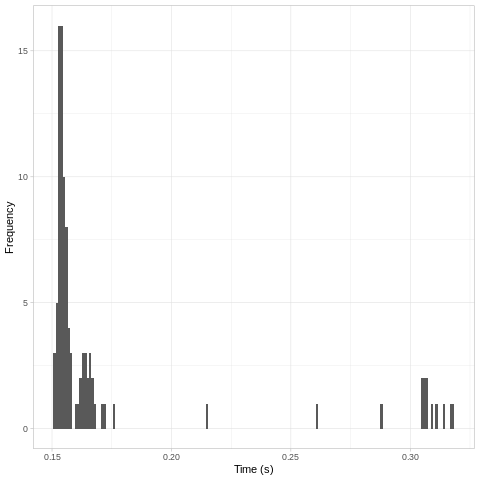

In [17]:
%%R
#addition
add_df <- data.frame()
for(i in 1:100) {
  add_df <- rbind(add_df, t(data.frame(i=as.vector(system.time(for(j in 1:10000000) 2038 + 8570)))))
}
rownames(add_df) <- (1:100)

ggplot(data = add_df, aes(x = V3)) +
  geom_histogram(binwidth = .001) + labs(x ="Time (s)", y="Frequency") + theme_light()

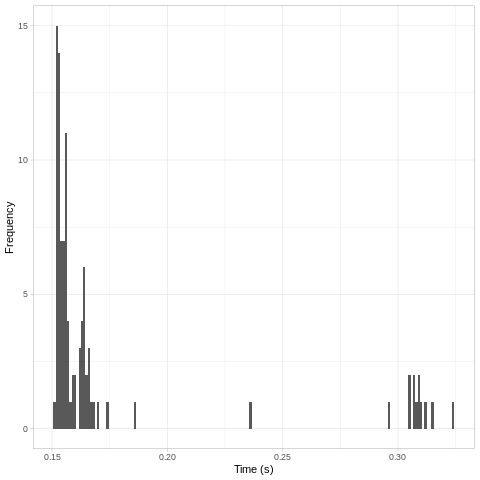

In [18]:
%%R
#multiplication
mult_df <- data.frame()
for(i in 1:100) {
  mult_df <- rbind(mult_df, t(data.frame(i=as.vector(system.time(for(j in 1:10000000) 208*657)))))
}
rownames(mult_df) <- (1:100)

ggplot(data = mult_df, aes(x = V3)) +
  geom_histogram(binwidth = .001) + labs(x ="Time (s)", y="Frequency") + theme_light()

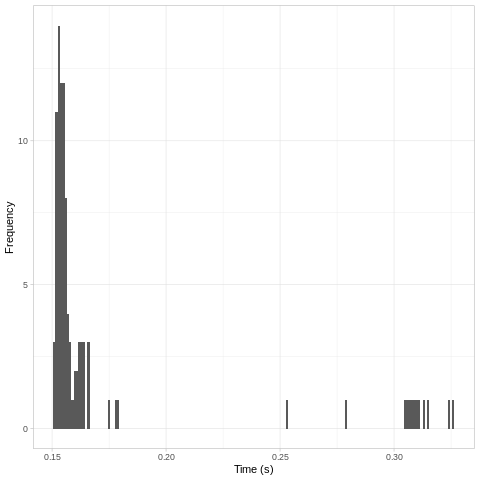

In [19]:
%%R
#powers
pow_df <- data.frame()
for(i in 1:100) {
  pow_df <- rbind(pow_df, t(data.frame(i=as.vector(system.time(for(j in 1:10000000) 384^0.5)))))
}
rownames(pow_df) <- (1:100)

ggplot(data = pow_df, aes(x = V3)) +
  geom_histogram(binwidth = .001) + labs(x ="Time (s)", y="Frequency") + theme_light()

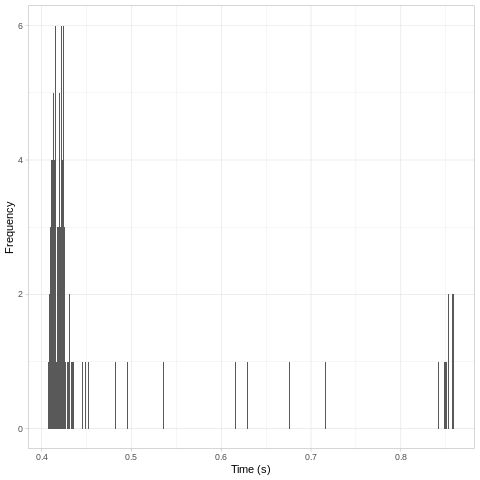

In [20]:
%%R
#log
log_df <- data.frame()
for(i in 1:100) {
  log_df <- rbind(log_df, t(data.frame(i=as.vector(system.time(for(j in 1:10000000) log(5632))))))
}
rownames(log_df) <- (1:100)

ggplot(data = log_df, aes(x = V3)) +
  geom_histogram(binwidth = .001) + labs(x ="Time (s)", y="Frequency") + theme_light()

The distributions are slightly skewed right, particularly the power histogram. There are a few upper outliers, especially in the log histogram. The time it takes for addition, multiplication, and powers are relatively the same, ranging from $[0.120,0.127]$ seconds. The logarithm takes approximately twice the time as compared to the other operations. Please note: the distributions change when the file is knitted so they may not all appear to be "skewed right," as they do now when answering this question.